<h1> Heart Disease prediction model</h1>
<hr></hr>


In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

file_name = 'heart.csv'
read_file = pd.read_csv(file_name)
df = pd.DataFrame(read_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


In [28]:
df1 = df.copy()
df1.shape

(1025, 14)

In [29]:
df1.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h1>EDA</h1>

In [30]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:>

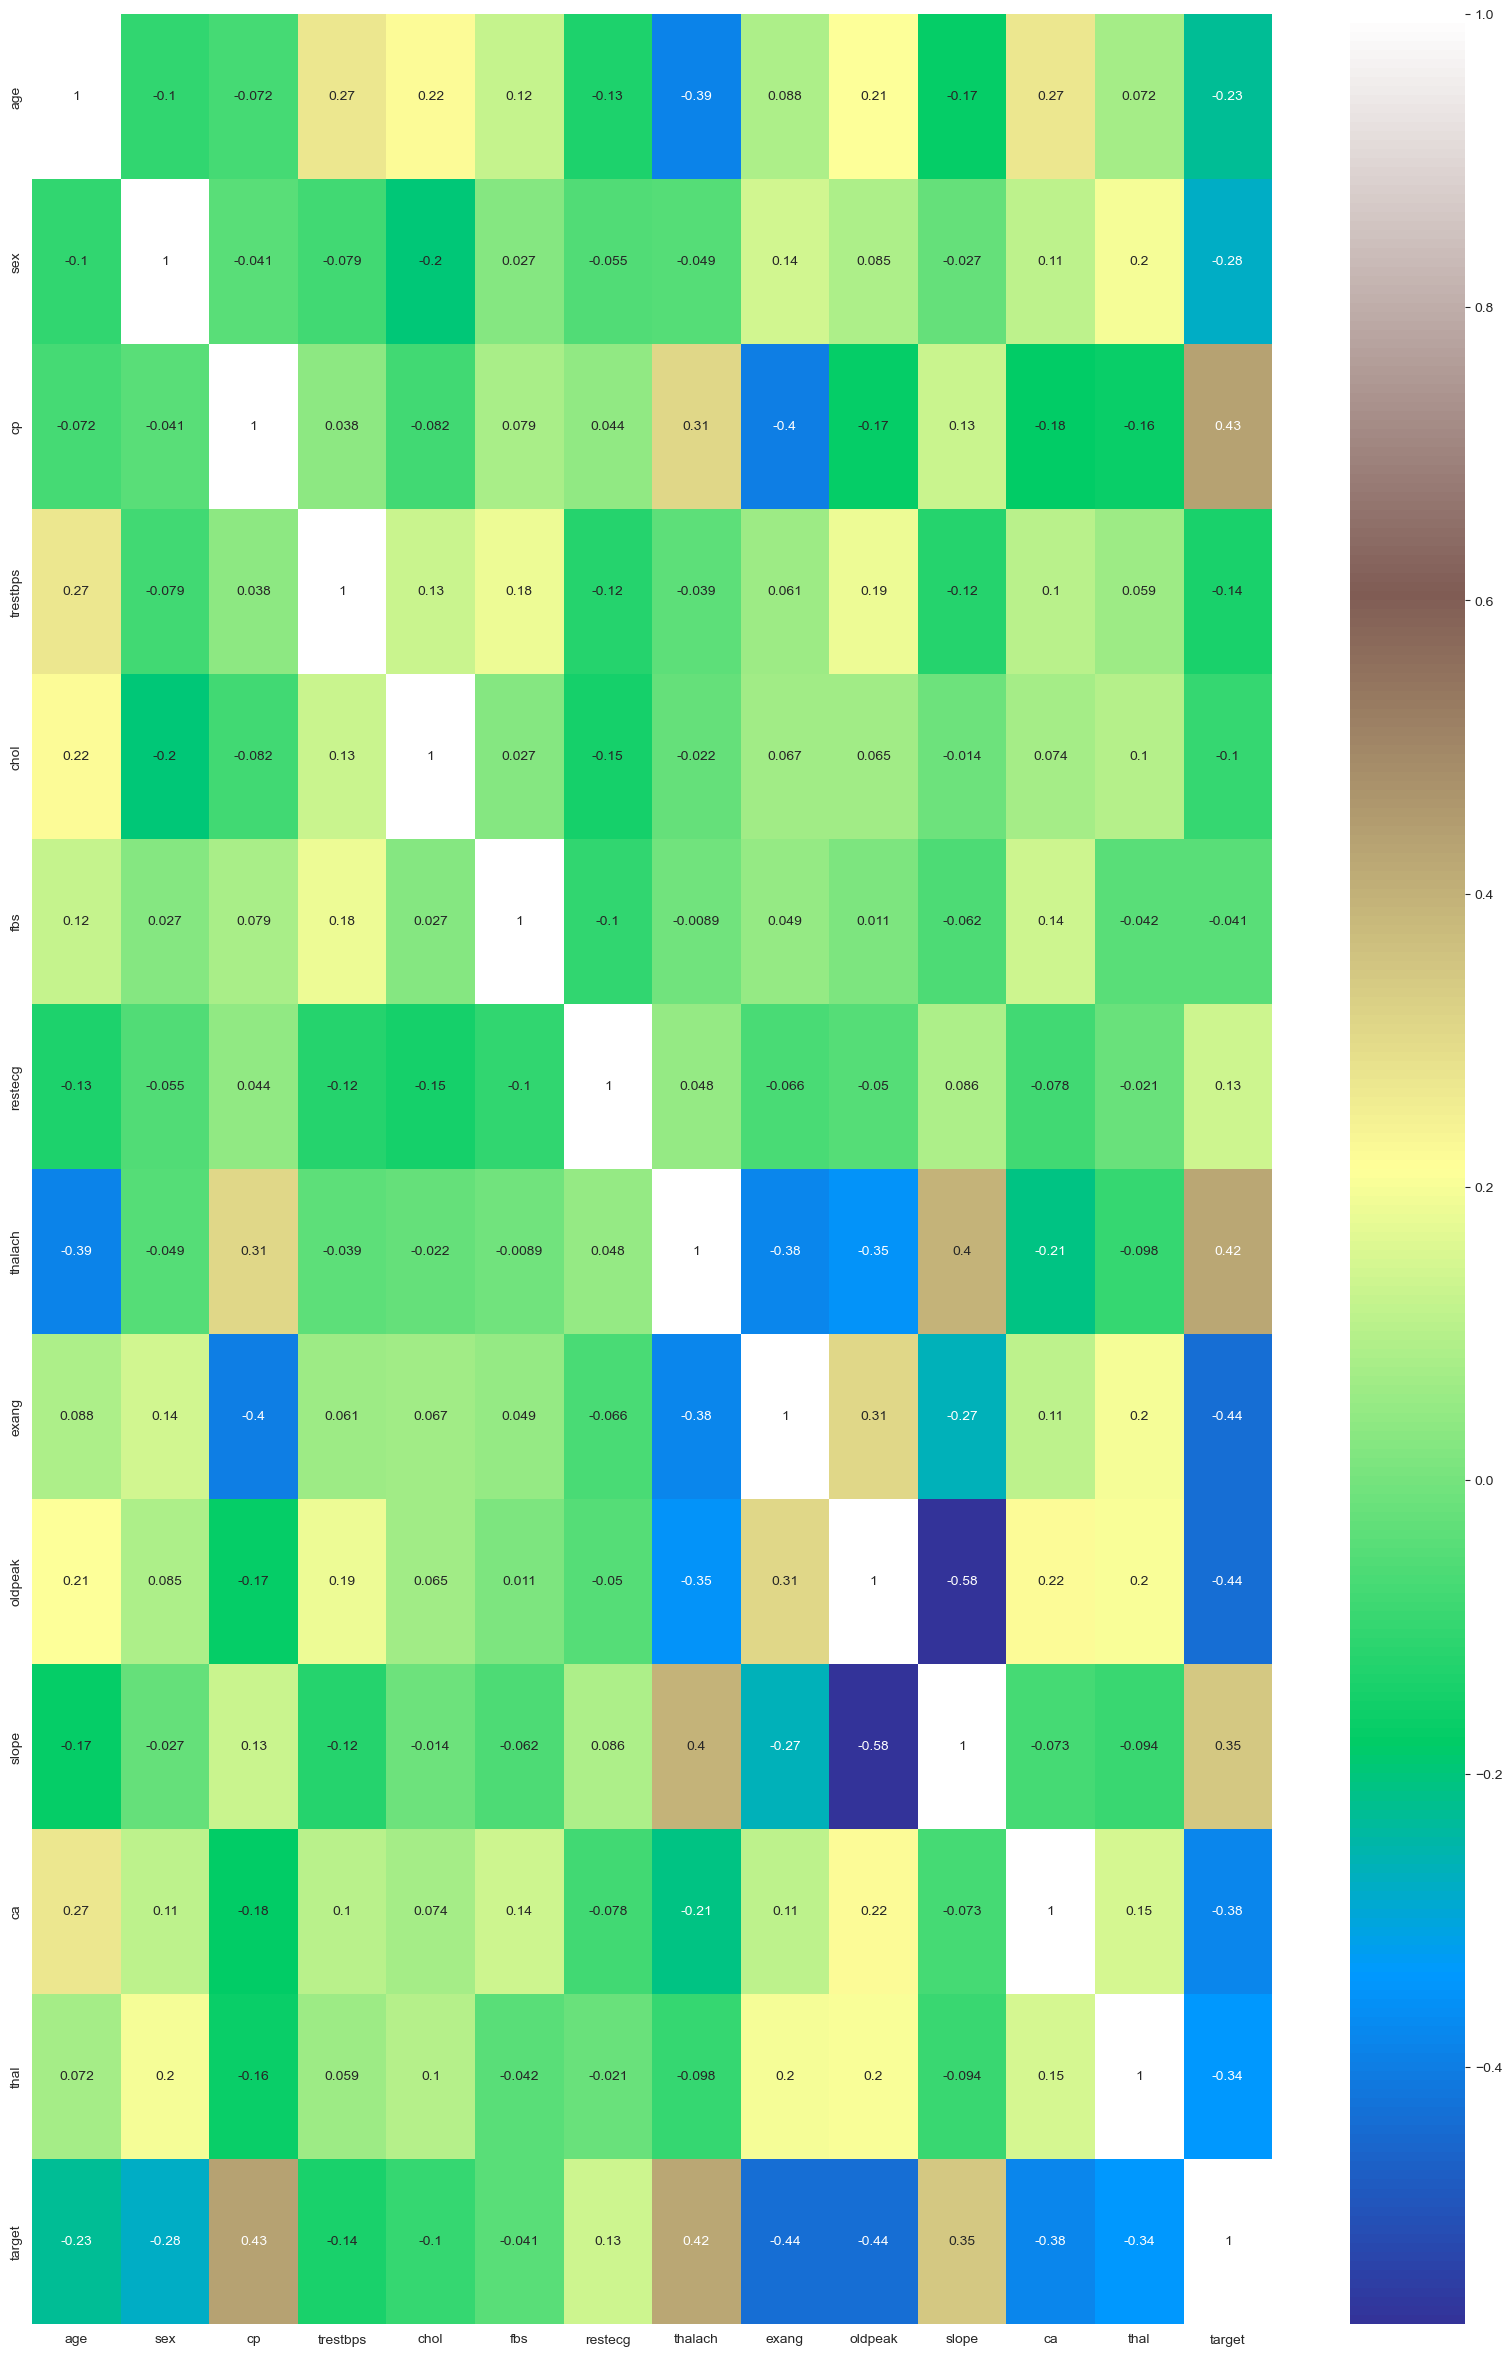

In [31]:

plt.figure(figsize=(20,30)) 
sns.heatmap(df1.corr(),annot=True,cmap="terrain")

<p> from the above we can conclude the following </p>
<ul> 
    <li>there is a positive correlation between a great number of features such as ag and oldpeak</li>
    <li> Also thalach and slope</li>
</ul> 
<p> On the other hand there are number of negative correlation readings:
<ul> 
    <li>Between Age and thalach </li>
    <li> Also Oldpeak and slope</li>
</ul> 

In [32]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


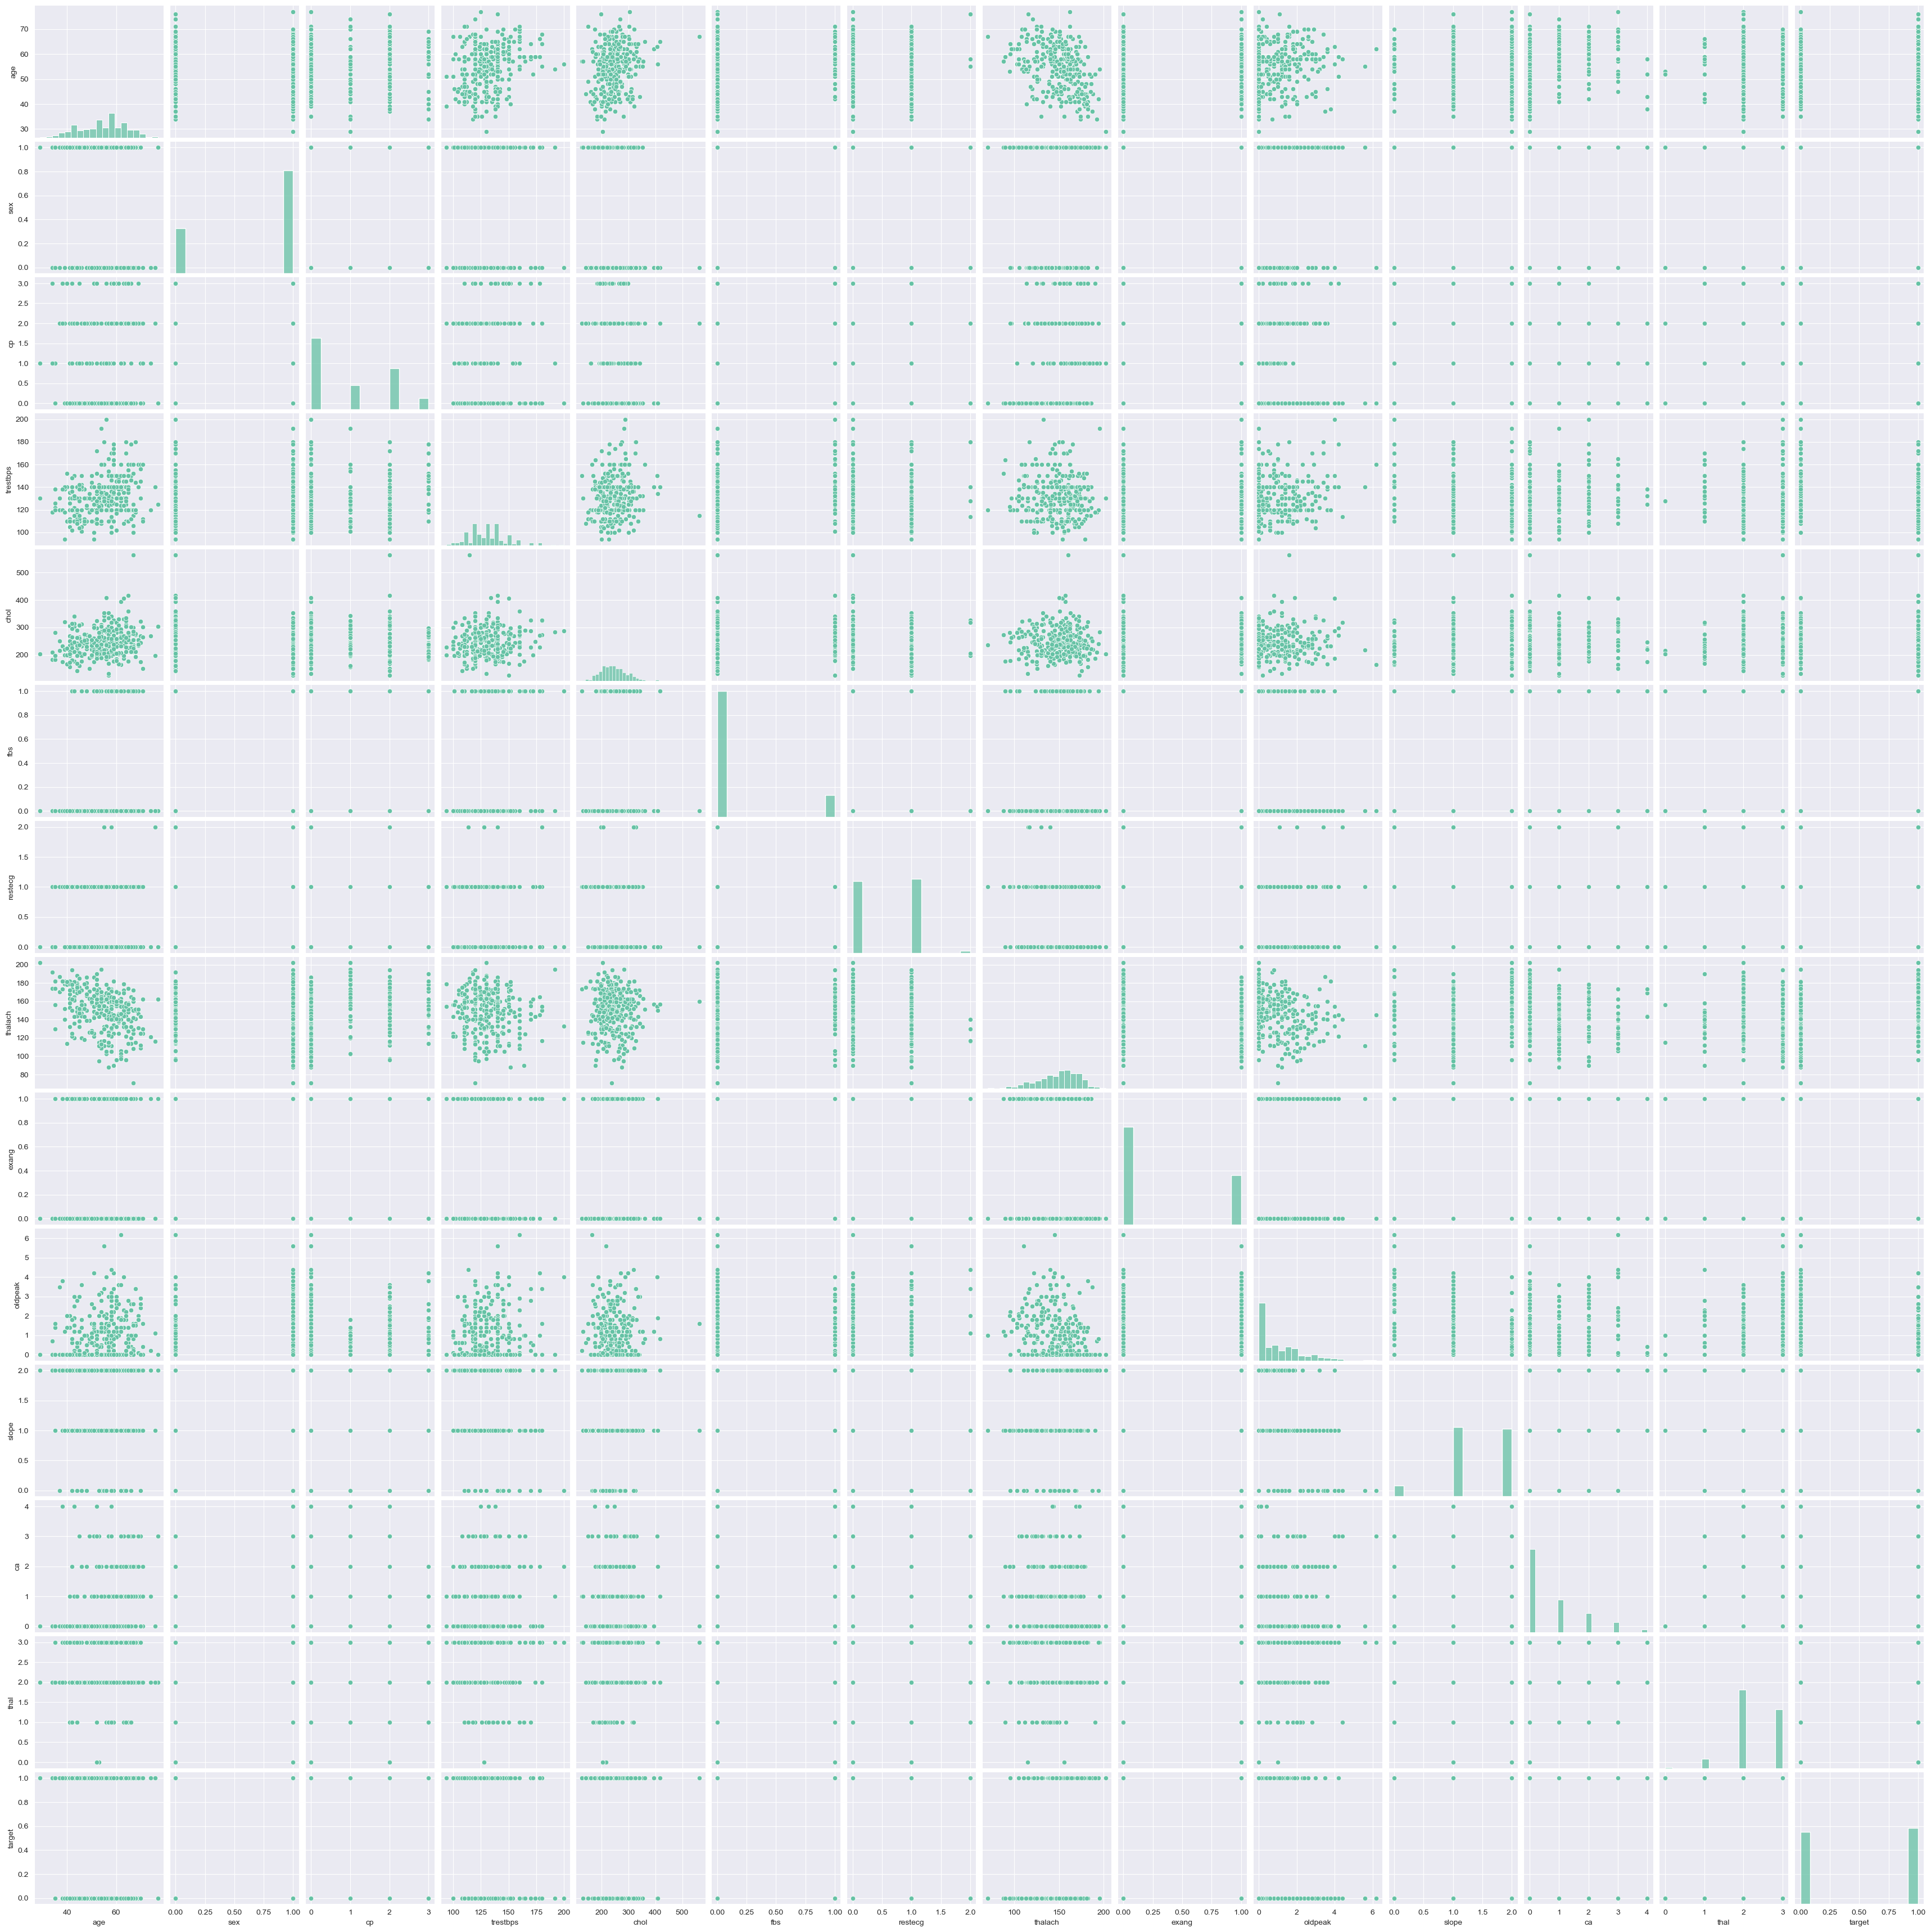

In [33]:
#using pairplot 
'''To visualize the relationship between different features and figure out any linear relation between them we take help
of PAIRPLOTS. I will give the link for the code and also the video explaining the data set in the end.''' 
sns.pairplot(data=df1)

<h3> Defining a function for sex </h3>

In [34]:
#classify sex either female  or male 
def sex_class(sex):
    if sex == 0 :
        return 'female'
    else: 
        return 'male'
df1['sex'] = df1['sex'].apply(sex_class)

# classify target 0 for no heart disease and 1 for Heart disease 

def target(target):
    if target == 0 : 
        return 'No Heart disease'
    else:
        return 'Heart Disease'

df1['target'] = df1['target'].apply(target)

df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,male,0,125,212,0,1,168,0,1.00,2,2,3,No Heart disease
1,53,male,0,140,203,1,0,155,1,3.10,0,0,3,No Heart disease
2,70,male,0,145,174,0,1,125,1,2.60,0,0,3,No Heart disease
3,61,male,0,148,203,0,1,161,0,0.00,2,1,3,No Heart disease
4,62,female,0,138,294,1,1,106,0,1.90,1,3,2,No Heart disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,male,1,140,221,0,1,164,1,0.00,2,0,2,Heart Disease
1021,60,male,0,125,258,0,0,141,1,2.80,1,1,3,No Heart disease
1022,47,male,0,110,275,0,0,118,1,1.00,1,1,2,No Heart disease
1023,50,female,0,110,254,0,0,159,0,0.00,2,0,2,Heart Disease


Text(0.5, 1.0, 'Gender Versus target values\n')

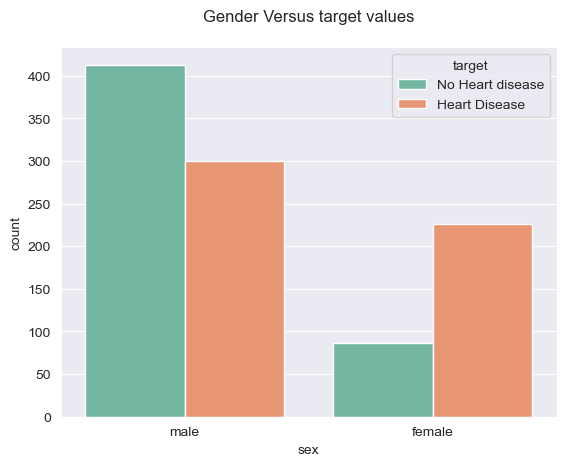

In [35]:

sns.countplot(data= df1, x='sex',hue='target')
plt.title('Gender Versus target values\n')

In [36]:
print('Total number of Males : ',df1.loc[df1['sex'] == 'male'].sex.count())
print('----------------')
print('Total number of Females : ',df1.loc[df1['sex'] == 'female'].sex.count())

Total number of Males :  713
----------------
Total number of Females :  312


Text(0.5, 1.0, 'Target Graph')

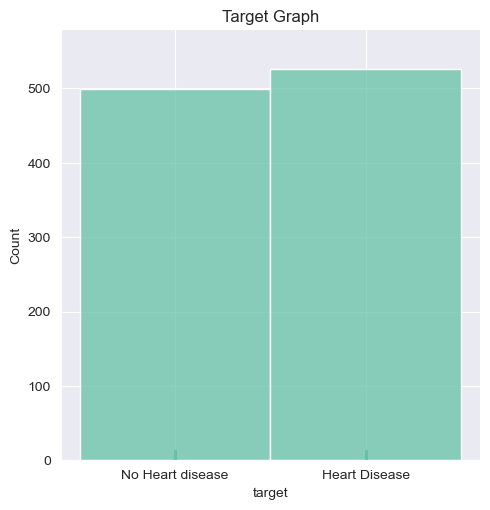

In [37]:
sns.displot(data=df1['target'], rug=True)
plt.title('Target Graph')

In [38]:
#  let's compare Chest pain vs target 
df1['cp'].unique()


array([0, 1, 2, 3], dtype=int64)

Text(0.5, 1.0, 'Chest Pain vs Gender')

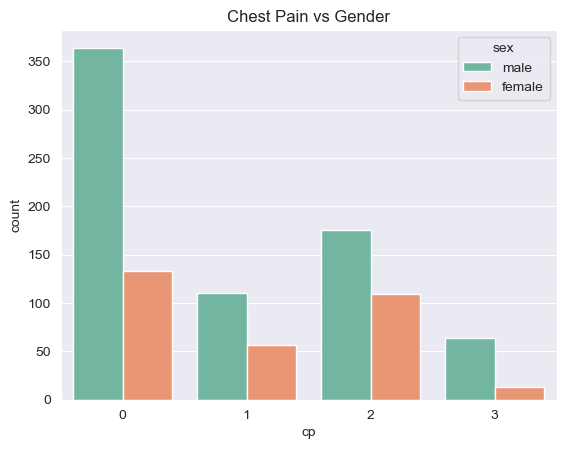

In [39]:
# let's see different chest pain variations vs gender 

sns.countplot(data=df1, x='cp', hue='sex')
plt.title('Chest Pain vs Gender')

Text(0.5, 1.0, 'Chest Pain vs Target')

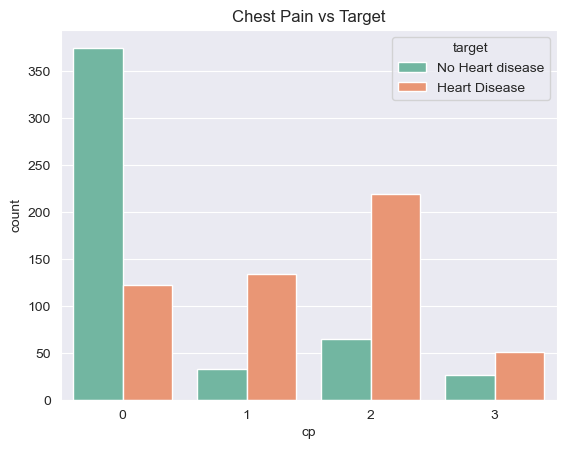

In [40]:
# let's do the same ewxecise , but this time we go for Chest pain vs target 

sns.countplot(data= df1, x='cp', hue='target' )
plt.title('Chest Pain vs Target')

Text(0.5, 1.0, 'cholesterol level vs heart rate')

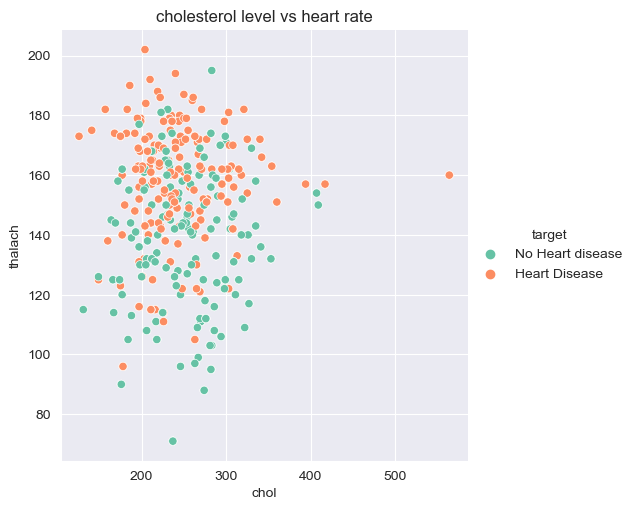

In [41]:
# let's see if there is a relationship between Heart rate and level of cholesterol 
sns.relplot(data=df1,x="chol", y="thalach", hue="target")
plt.title('cholesterol level vs heart rate')

Text(0.5, 1.0, 'exercises vs target')

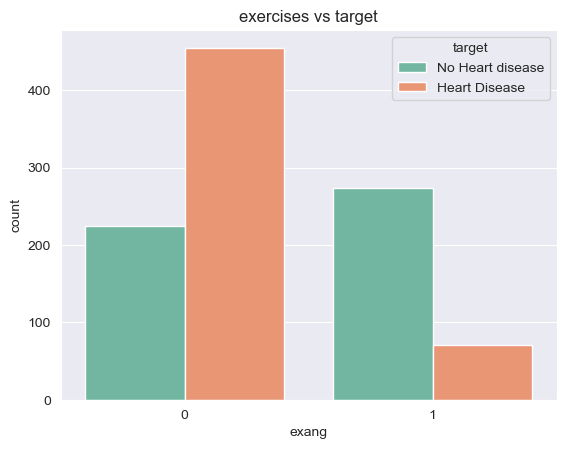

In [42]:
# do exercises makes a person less likely to suffer a heart failure 

sns.countplot(data=df1, x='exang', hue='target')
plt.title('exercises vs target')

<h3>Model development - Machine learning algorithms</h3>

<h4>Decision Tree algorhtim </h4>

In [43]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

df2 = df.copy()


In [44]:
x = df2.iloc[:,0:13] #features
y = df2.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train) # classifier
#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403


<h2>Implementation of Lazypredict method </h2> 

In [46]:
#Now, here is how you can use the Lazy Predict Library to check the performance of all classification machine learning models:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.36it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,0.18
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.02
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.03
BaggingClassifier,0.99,0.99,0.99,0.99,0.10
LGBMClassifier,0.99,0.99,0.99,0.99,0.25
LabelPropagation,0.99,0.99,0.99,0.99,0.09
RandomForestClassifier,0.99,0.99,0.99,0.99,0.31
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.24
LabelSpreading,0.99,0.99,0.99,0.99,0.07


<h2> Deep learning </h2>

Iteration 1, loss = 13.15386077
Iteration 2, loss = 0.93893669
Iteration 3, loss = 0.83850353
Iteration 4, loss = 0.83006823
Iteration 5, loss = 0.82185066
Iteration 6, loss = 0.81380535
Iteration 7, loss = 0.80632887
Iteration 8, loss = 0.79888844
Iteration 9, loss = 0.79166278
Iteration 10, loss = 0.78521332
Iteration 11, loss = 0.77854129
Iteration 12, loss = 0.77235694
Iteration 13, loss = 0.76620795
Iteration 14, loss = 0.76089286
Iteration 15, loss = 0.75553935
Iteration 16, loss = 0.75052156
Iteration 17, loss = 0.74543274
Iteration 18, loss = 0.74131542
Iteration 19, loss = 0.73697958
Iteration 20, loss = 0.73318133
Iteration 21, loss = 0.72959238
Iteration 22, loss = 0.72619036
Iteration 23, loss = 0.72328311
Iteration 24, loss = 0.72036580
Iteration 25, loss = 0.71768500
Iteration 26, loss = 0.71530553
Iteration 27, loss = 0.71295889
Iteration 28, loss = 0.71099738
Iteration 29, loss = 0.70899312
Iteration 30, loss = 0.70727627
Iteration 31, loss = 0.70576054
Iteration 32, lo

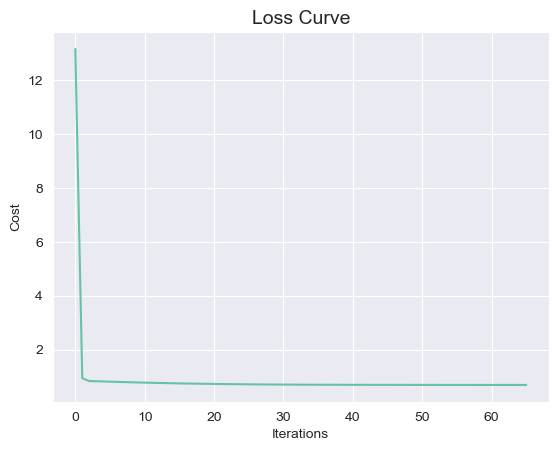

Iteration 1, loss = 10.19033598
Iteration 2, loss = 3.39513637
Iteration 3, loss = 2.73321387
Iteration 4, loss = 1.28432974
Iteration 5, loss = 1.15562250
Iteration 6, loss = 0.93227090
Iteration 7, loss = 0.87682254
Iteration 8, loss = 0.73668230
Iteration 9, loss = 0.65352125
Iteration 10, loss = 0.56606160
Iteration 11, loss = 0.54671084
Iteration 12, loss = 0.55707689
Iteration 13, loss = 0.55523377
Iteration 14, loss = 0.55755146
Iteration 15, loss = 0.54071567
Iteration 16, loss = 0.53626487
Iteration 17, loss = 0.53173561
Iteration 18, loss = 0.50929700
Iteration 19, loss = 0.50403182
Iteration 20, loss = 0.50578152
Iteration 21, loss = 0.52370506
Iteration 22, loss = 0.50072033
Iteration 23, loss = 0.48226059
Iteration 24, loss = 0.48120244
Iteration 25, loss = 0.47501155
Iteration 26, loss = 0.53004819
Iteration 27, loss = 0.54785032
Iteration 28, loss = 0.55539762
Iteration 29, loss = 0.52455941
Iteration 30, loss = 0.49729917
Iteration 31, loss = 0.46606864
Iteration 32, lo

In [20]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(9,8,3), random_state=None,max_iter = 1000, activation = 'relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print(accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_) 

grid_predictions = grid.predict(x_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Iteration 1, loss = 7.41292740
Iteration 2, loss = 1.43890223
Iteration 3, loss = 1.35129492
Iteration 4, loss = 1.16406250
Iteration 5, loss = 0.97787012
Iteration 6, loss = 0.84913669
Iteration 7, loss = 0.73490906
Iteration 8, loss = 0.69038478
Iteration 9, loss = 0.67418851
Iteration 10, loss = 0.67147908
Iteration 11, loss = 0.66069119
Iteration 12, loss = 0.64150450
Iteration 13, loss = 0.64906161
Iteration 14, loss = 0.63216476
Iteration 15, loss = 0.62849584
Iteration 16, loss = 0.62591179
Iteration 17, loss = 0.60611752
Iteration 18, loss = 0.61208593
Iteration 19, loss = 0.60162793
Iteration 20, loss = 0.60075371
Iteration 21, loss = 0.59307123
Iteration 22, loss = 0.59075869
Iteration 23, loss = 0.58678591
Iteration 24, loss = 0.58448395
Iteration 25, loss = 0.58221733
Iteration 26, loss = 0.57694395
Iteration 27, loss = 0.57244541
Iteration 28, loss = 0.56892767
Iteration 29, loss = 0.56761415
Iteration 30, loss = 0.56561973
Iteration 31, loss = 0.57378041
Iteration 32, los

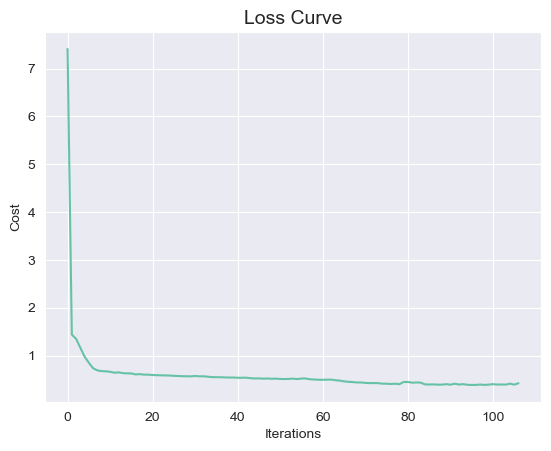

Iteration 1, loss = 8.07777061
Iteration 2, loss = 1.21498441
Iteration 3, loss = 1.95881756
Iteration 4, loss = 1.18070150
Iteration 5, loss = 0.84403557
Iteration 6, loss = 0.75128436
Iteration 7, loss = 0.67128560
Iteration 8, loss = 0.63779645
Iteration 9, loss = 0.61750443
Iteration 10, loss = 0.58738714
Iteration 11, loss = 0.61230694
Iteration 12, loss = 0.59227970
Iteration 13, loss = 0.67083426
Iteration 14, loss = 0.63938901
Iteration 15, loss = 0.60694922
Iteration 16, loss = 0.57735557
Iteration 17, loss = 0.53706640
Iteration 18, loss = 0.54188165
Iteration 19, loss = 0.52609232
Iteration 20, loss = 0.51172244
Iteration 21, loss = 0.50349858
Iteration 22, loss = 0.56907696
Iteration 23, loss = 0.65490698
Iteration 24, loss = 0.61164624
Iteration 25, loss = 0.53490383
Iteration 26, loss = 0.51411788
Iteration 27, loss = 0.49225607
Iteration 28, loss = 0.46056377
Iteration 29, loss = 0.46125945
Iteration 30, loss = 0.44529317
Iteration 31, loss = 0.45342052
Iteration 32, los

In [21]:
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(9,8,3), random_state=None,max_iter = 1000, activation = 'relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print(accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_) 

grid_predictions = grid.predict(x_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

In [22]:
#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)


0.8603896103896104

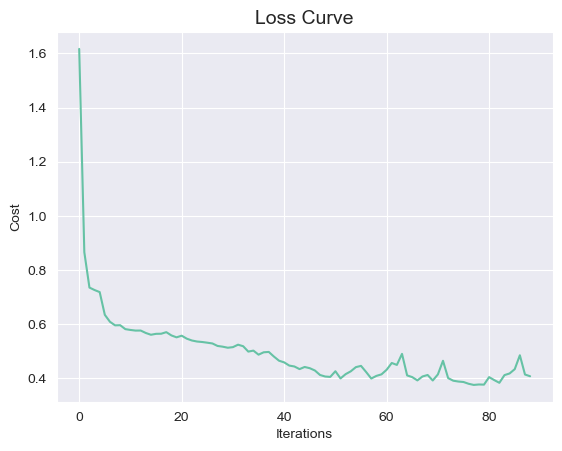

In [93]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [23]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(clf, param_grid, n_jobs= -1, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_) 
    

Iteration 1, loss = 8.11789684
Iteration 2, loss = 1.23327171
Iteration 3, loss = 0.97142659
Iteration 4, loss = 0.93796483
Iteration 5, loss = 0.79165091
Iteration 6, loss = 0.66618781
Iteration 7, loss = 0.64228386
Iteration 8, loss = 0.56168975
Iteration 9, loss = 0.56979934
Iteration 10, loss = 0.56525813
Iteration 11, loss = 0.77514945
Iteration 12, loss = 0.78160490
Iteration 13, loss = 0.64508273
Iteration 14, loss = 0.51225611
Iteration 15, loss = 0.56908795
Iteration 16, loss = 0.51169900
Iteration 17, loss = 0.55872064
Iteration 18, loss = 0.56292599
Iteration 19, loss = 0.60902023
Iteration 20, loss = 0.83724989
Iteration 21, loss = 0.79468828
Iteration 22, loss = 0.55605972
Iteration 23, loss = 0.54485600
Iteration 24, loss = 0.55204705
Iteration 25, loss = 0.53286807
Iteration 26, loss = 0.53779838
Iteration 27, loss = 0.48884186
Iteration 28, loss = 0.44830382
Iteration 29, loss = 0.44062309
Iteration 30, loss = 0.46353725
Iteration 31, loss = 0.43583859
Iteration 32, los

In [24]:
grid_predictions = grid.predict(x_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.82


<h2> List of MLPs tests </h2>
<hr>
<h2>MLP test 1 - Relu </h2>

Iteration 1, loss = 17.50996901
Iteration 2, loss = 7.20619725
Iteration 3, loss = 2.33852208
Iteration 4, loss = 1.54845779
Iteration 5, loss = 1.26639017
Iteration 6, loss = 1.16134252
Iteration 7, loss = 0.97200845
Iteration 8, loss = 0.85057473
Iteration 9, loss = 0.76045823
Iteration 10, loss = 0.70441620
Iteration 11, loss = 0.67135950
Iteration 12, loss = 0.64686839
Iteration 13, loss = 0.62672883
Iteration 14, loss = 0.60134679
Iteration 15, loss = 0.59208440
Iteration 16, loss = 0.56972860
Iteration 17, loss = 0.56279224
Iteration 18, loss = 0.54253071
Iteration 19, loss = 0.52885159
Iteration 20, loss = 0.53705590
Iteration 21, loss = 0.52368269
Iteration 22, loss = 0.52529906
Iteration 23, loss = 0.51327164
Iteration 24, loss = 0.50019358
Iteration 25, loss = 0.49563910
Iteration 26, loss = 0.48791161
Iteration 27, loss = 0.48023690
Iteration 28, loss = 0.48168284
Iteration 29, loss = 0.48627366
Iteration 30, loss = 0.49914828
Iteration 31, loss = 0.52487233
Iteration 32, lo

C:\Users\limit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


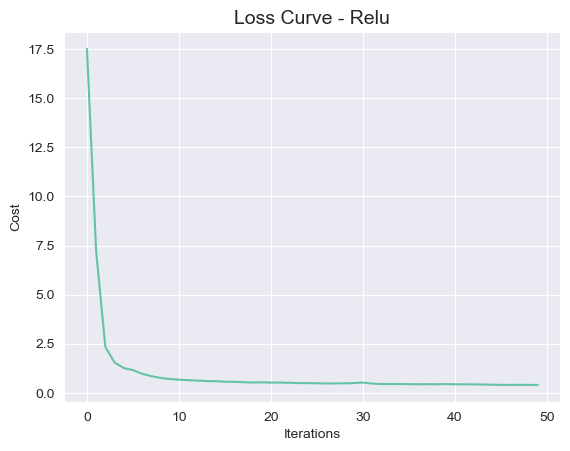

In [25]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(14,10,8), random_state=None,max_iter = 50, activation = 'relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 2 - Relu</h2>

Iteration 1, loss = 12.25343908
Iteration 2, loss = 4.99018680
Iteration 3, loss = 2.97805980
Iteration 4, loss = 1.57295778
Iteration 5, loss = 1.08855049
Iteration 6, loss = 0.93421916
Iteration 7, loss = 0.76845128
Iteration 8, loss = 0.71794540
Iteration 9, loss = 0.69223363
Iteration 10, loss = 0.68866139
Iteration 11, loss = 0.60582790
Iteration 12, loss = 0.59356228
Iteration 13, loss = 0.58596669
Iteration 14, loss = 0.58337561
Iteration 15, loss = 0.57507924
Iteration 16, loss = 0.56303366
Iteration 17, loss = 0.55427039
Iteration 18, loss = 0.55003457
Iteration 19, loss = 0.54620426
Iteration 20, loss = 0.55731198
Iteration 21, loss = 0.54847636
Iteration 22, loss = 0.53984665
Iteration 23, loss = 0.53402911
Iteration 24, loss = 0.52721213
Iteration 25, loss = 0.52514729
Iteration 26, loss = 0.53675234
Iteration 27, loss = 0.52509821
Iteration 28, loss = 0.52118049
Iteration 29, loss = 0.51471072
Iteration 30, loss = 0.50525859
Iteration 31, loss = 0.49958516
Iteration 32, lo

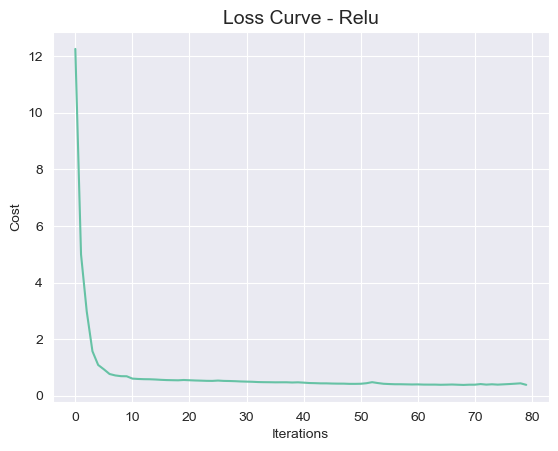

In [26]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15,10,8), random_state=None,max_iter = 100, activation = 'relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 3 - Relu</h2>

Iteration 1, loss = 3.96753270
Iteration 2, loss = 0.69421949
Iteration 3, loss = 0.67337632
Iteration 4, loss = 0.65714024
Iteration 5, loss = 0.65539203
Iteration 6, loss = 0.64587064
Iteration 7, loss = 0.64099475
Iteration 8, loss = 0.64659386
Iteration 9, loss = 0.62731524
Iteration 10, loss = 0.62940165
Iteration 11, loss = 0.62359405
Iteration 12, loss = 0.61846246
Iteration 13, loss = 0.61633682
Iteration 14, loss = 0.60716394
Iteration 15, loss = 0.59884152
Iteration 16, loss = 0.59553626
Iteration 17, loss = 0.59204366
Iteration 18, loss = 0.58948056
Iteration 19, loss = 0.58458573
Iteration 20, loss = 0.59021122
Iteration 21, loss = 0.58031493
Iteration 22, loss = 0.57254382
Iteration 23, loss = 0.56386160
Iteration 24, loss = 0.54918985
Iteration 25, loss = 0.55897624
Iteration 26, loss = 0.54569235
Iteration 27, loss = 0.55532209
Iteration 28, loss = 0.55304582
Iteration 29, loss = 0.50804258
Iteration 30, loss = 0.50676234
Iteration 31, loss = 0.50241059
Iteration 32, los

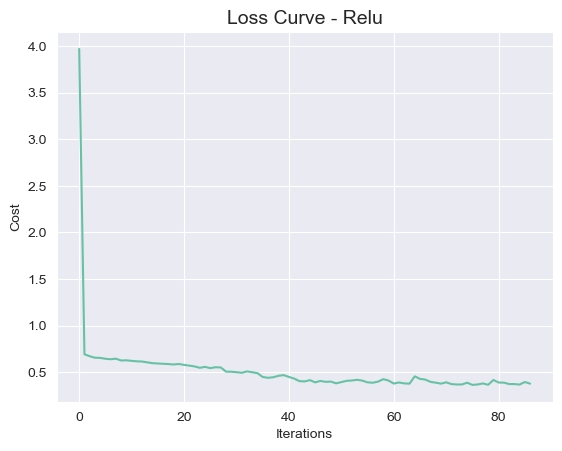

In [27]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,15,12), random_state=None,max_iter = 150, activation = 'relu', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Relu", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP test 1 - Tanh

Iteration 1, loss = 0.71479643
Iteration 2, loss = 0.69479908
Iteration 3, loss = 0.69108785
Iteration 4, loss = 0.69067445
Iteration 5, loss = 0.68622371
Iteration 6, loss = 0.67726668
Iteration 7, loss = 0.65832192
Iteration 8, loss = 0.63586241
Iteration 9, loss = 0.60973439
Iteration 10, loss = 0.62685298
Iteration 11, loss = 0.63307595
Iteration 12, loss = 0.59210306
Iteration 13, loss = 0.59733331
Iteration 14, loss = 0.61033871
Iteration 15, loss = 0.59284234
Iteration 16, loss = 0.57402232
Iteration 17, loss = 0.58805639
Iteration 18, loss = 0.56833427
Iteration 19, loss = 0.56123782
Iteration 20, loss = 0.56933288
Iteration 21, loss = 0.55955980
Iteration 22, loss = 0.55514804
Iteration 23, loss = 0.56528969
Iteration 24, loss = 0.54668697
Iteration 25, loss = 0.53887526
Iteration 26, loss = 0.54116517
Iteration 27, loss = 0.54894198
Iteration 28, loss = 0.56292151
Iteration 29, loss = 0.56439015
Iteration 30, loss = 0.55057711
Iteration 31, loss = 0.52447590
Iteration 32, los

C:\Users\limit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


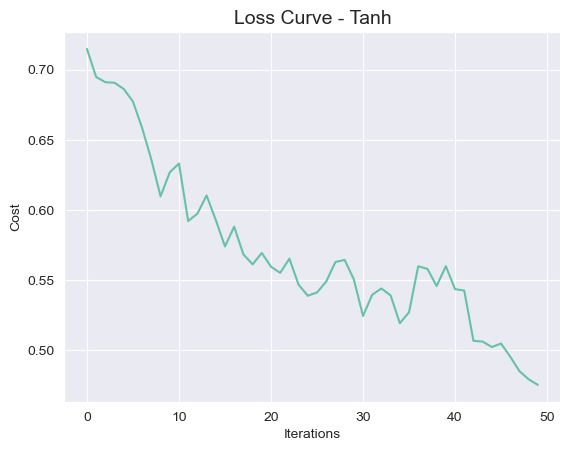

In [28]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(14,10,8), random_state=None,max_iter = 50, activation = 'tanh', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


<h2> MLP test 2 - Tanh</h2>

Iteration 1, loss = 0.70585057
Iteration 2, loss = 0.68668881
Iteration 3, loss = 0.66818524
Iteration 4, loss = 0.66767253
Iteration 5, loss = 0.66190676
Iteration 6, loss = 0.65877494
Iteration 7, loss = 0.66116868
Iteration 8, loss = 0.65357394
Iteration 9, loss = 0.64963460
Iteration 10, loss = 0.66620258
Iteration 11, loss = 0.66534174
Iteration 12, loss = 0.66470486
Iteration 13, loss = 0.63322068
Iteration 14, loss = 0.61937543
Iteration 15, loss = 0.61474033
Iteration 16, loss = 0.58890969
Iteration 17, loss = 0.57116087
Iteration 18, loss = 0.54557526
Iteration 19, loss = 0.52200046
Iteration 20, loss = 0.58538013
Iteration 21, loss = 0.57040728
Iteration 22, loss = 0.66684394
Iteration 23, loss = 0.58921430
Iteration 24, loss = 0.57418904
Iteration 25, loss = 0.59818777
Iteration 26, loss = 0.54063925
Iteration 27, loss = 0.52983877
Iteration 28, loss = 0.51780827
Iteration 29, loss = 0.52177952
Iteration 30, loss = 0.49340504
Iteration 31, loss = 0.48450474
Iteration 32, los

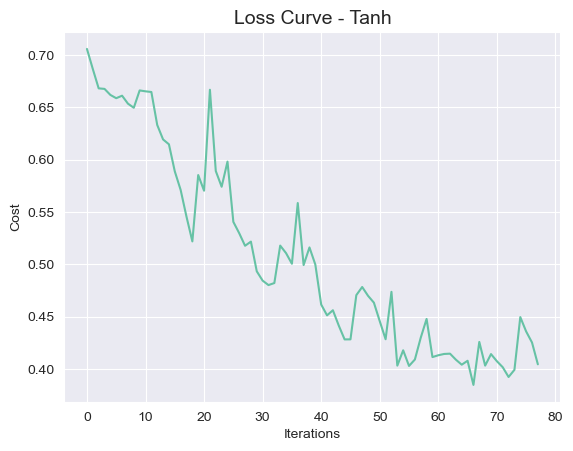

In [29]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15,10,8), random_state=None,max_iter = 100, activation = 'tanh', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP Test 3 - Tanh</h2>

Iteration 1, loss = 0.73169172
Iteration 2, loss = 0.68144921
Iteration 3, loss = 0.67142328
Iteration 4, loss = 0.67976378
Iteration 5, loss = 0.66293392
Iteration 6, loss = 0.66602308
Iteration 7, loss = 0.65947122
Iteration 8, loss = 0.65915572
Iteration 9, loss = 0.65319461
Iteration 10, loss = 0.65895786
Iteration 11, loss = 0.65196287
Iteration 12, loss = 0.64278878
Iteration 13, loss = 0.63599041
Iteration 14, loss = 0.62196271
Iteration 15, loss = 0.61351383
Iteration 16, loss = 0.61055807
Iteration 17, loss = 0.56758920
Iteration 18, loss = 0.60628932
Iteration 19, loss = 0.58538444
Iteration 20, loss = 0.54519175
Iteration 21, loss = 0.53783762
Iteration 22, loss = 0.53283011
Iteration 23, loss = 0.51398632
Iteration 24, loss = 0.54072027
Iteration 25, loss = 0.51410024
Iteration 26, loss = 0.47355342
Iteration 27, loss = 0.43698758
Iteration 28, loss = 0.48618036
Iteration 29, loss = 0.51153019
Iteration 30, loss = 0.51018601
Iteration 31, loss = 0.48396920
Iteration 32, los

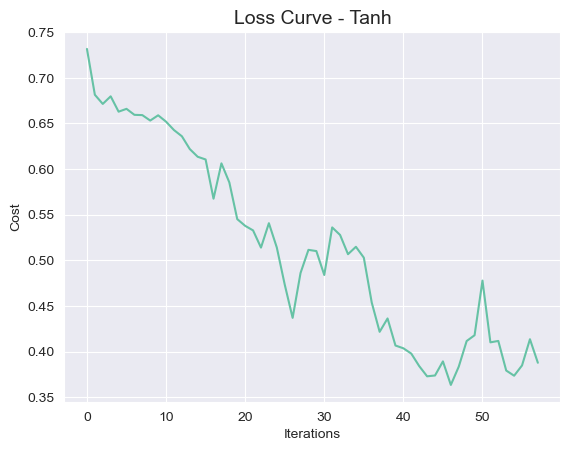

In [33]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,15,12), random_state=None,max_iter = 150, activation = 'tanh', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Tanh", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP test 1 - Logistic Regression activation function </h2>

Iteration 1, loss = 0.70372180
Iteration 2, loss = 0.69393007
Iteration 3, loss = 0.69328516
Iteration 4, loss = 0.69428906
Iteration 5, loss = 0.69274179
Iteration 6, loss = 0.69101031
Iteration 7, loss = 0.68962777
Iteration 8, loss = 0.68893033
Iteration 9, loss = 0.68750051
Iteration 10, loss = 0.68466741
Iteration 11, loss = 0.68138562
Iteration 12, loss = 0.67793022
Iteration 13, loss = 0.67250732
Iteration 14, loss = 0.66348267
Iteration 15, loss = 0.65297525
Iteration 16, loss = 0.64198923
Iteration 17, loss = 0.63238971
Iteration 18, loss = 0.61500958
Iteration 19, loss = 0.60067634
Iteration 20, loss = 0.58120575
Iteration 21, loss = 0.55896638
Iteration 22, loss = 0.55072461
Iteration 23, loss = 0.52655931
Iteration 24, loss = 0.51011859
Iteration 25, loss = 0.53976945
Iteration 26, loss = 0.51506107
Iteration 27, loss = 0.48404567
Iteration 28, loss = 0.48103597
Iteration 29, loss = 0.48997695
Iteration 30, loss = 0.50119146
Iteration 31, loss = 0.46769217
Iteration 32, los

C:\Users\limit\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


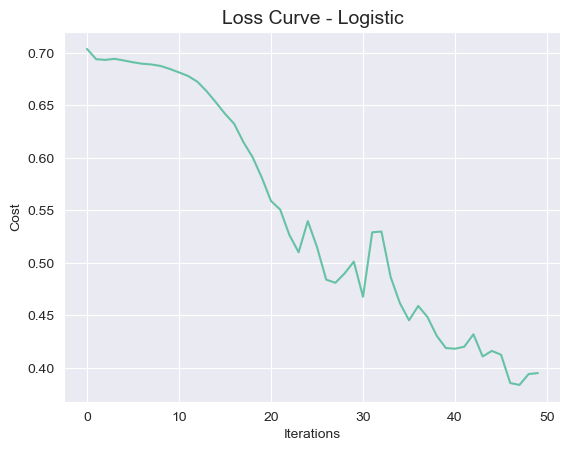

In [34]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(14,10,8), random_state=None,max_iter = 50, activation = 'logistic', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP test 2 - Logistic Regression activation function </h2>

Iteration 1, loss = 0.70581861
Iteration 2, loss = 0.69281219
Iteration 3, loss = 0.69494135
Iteration 4, loss = 0.69413141
Iteration 5, loss = 0.69162994
Iteration 6, loss = 0.69131318
Iteration 7, loss = 0.69000921
Iteration 8, loss = 0.68927554
Iteration 9, loss = 0.68785845
Iteration 10, loss = 0.68625993
Iteration 11, loss = 0.68355939
Iteration 12, loss = 0.68024121
Iteration 13, loss = 0.67434182
Iteration 14, loss = 0.66544957
Iteration 15, loss = 0.65354975
Iteration 16, loss = 0.63684807
Iteration 17, loss = 0.61483975
Iteration 18, loss = 0.59153844
Iteration 19, loss = 0.58788881
Iteration 20, loss = 0.56240977
Iteration 21, loss = 0.53942165
Iteration 22, loss = 0.51400628
Iteration 23, loss = 0.51874763
Iteration 24, loss = 0.53595750
Iteration 25, loss = 0.53344337
Iteration 26, loss = 0.54609882
Iteration 27, loss = 0.51764285
Iteration 28, loss = 0.50727987
Iteration 29, loss = 0.47757706
Iteration 30, loss = 0.47314534
Iteration 31, loss = 0.47427793
Iteration 32, los

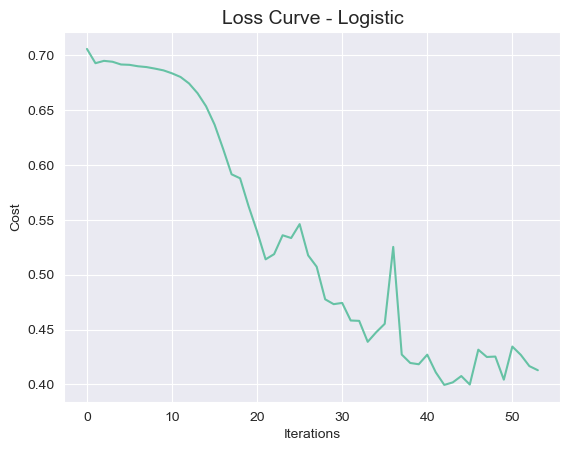

In [37]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(15,10,8), random_state=None,max_iter = 100, activation = 'logistic', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

<h2> MLP test 3 - Logistic Regression activation function </h2>

Iteration 1, loss = 0.69773597
Iteration 2, loss = 0.69342108
Iteration 3, loss = 0.69362924
Iteration 4, loss = 0.69219375
Iteration 5, loss = 0.69116311
Iteration 6, loss = 0.69109348
Iteration 7, loss = 0.68756106
Iteration 8, loss = 0.68472327
Iteration 9, loss = 0.67815624
Iteration 10, loss = 0.66906357
Iteration 11, loss = 0.65821766
Iteration 12, loss = 0.63666098
Iteration 13, loss = 0.61585267
Iteration 14, loss = 0.58899434
Iteration 15, loss = 0.56099015
Iteration 16, loss = 0.53956966
Iteration 17, loss = 0.52906406
Iteration 18, loss = 0.51868524
Iteration 19, loss = 0.48387586
Iteration 20, loss = 0.51730361
Iteration 21, loss = 0.47641065
Iteration 22, loss = 0.46940994
Iteration 23, loss = 0.46016262
Iteration 24, loss = 0.44306547
Iteration 25, loss = 0.45795141
Iteration 26, loss = 0.45084545
Iteration 27, loss = 0.43897724
Iteration 28, loss = 0.41944627
Iteration 29, loss = 0.42140335
Iteration 30, loss = 0.42475741
Iteration 31, loss = 0.41494419
Iteration 32, los

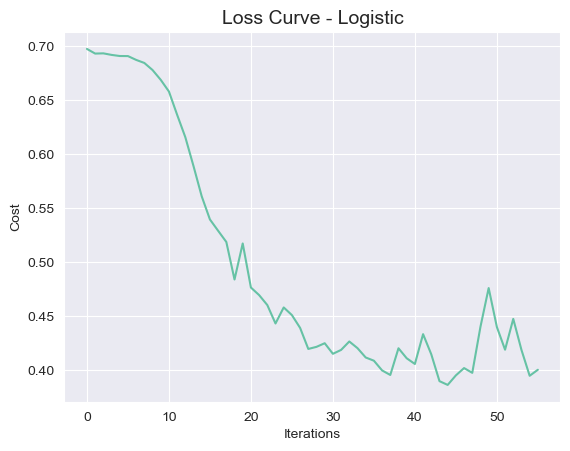

In [36]:
#Let's define a new copy for the dataset

df3 = df.copy()

x = df3.iloc[:,0:13] #features
y = df3.iloc[:,13] # target 

# 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
#Build Classification Model
#building the MLP model
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20,15,12), random_state=None,max_iter = 150, activation = 'logistic', verbose=True, learning_rate_init=0.01)

# Fit data onto the model
clf.fit(x_train,y_train)

#Make Predictions and Evaluate the Model
# Make prediction on test dataset
ypred=clf.predict(x_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
print('Model Accuracy is : ', accuracy_score(y_test,ypred))

plt.plot(clf.loss_curve_)
plt.title("Loss Curve - Logistic", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()